# Project: EDA and ML on Avacado Data Set

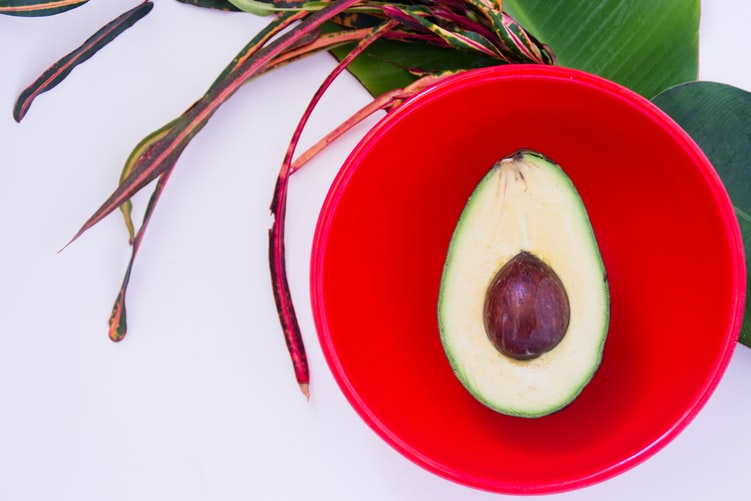

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
    3a.[Data Visualization](#section3a)<br>
    3b.[Data Cleaning](#section3b)<br>
4. [Data Preparation for Modelling](#section4)<br>
    4a.[Encoding CategoricalData](#section4a)<br>
    4b.[Scaling Of Data](#section4b)<br>       
5. [Modelling](#section5)<br>
    - 5.1 [Assumptions of Linear Regression](#section5a)<br>
    - 5.2 [Modelling using Linear Regression](#section5b)<br>  
    - 5.3 [Model evaluation for Linear Regression](#section5c)<br>   
    - 5.4 [Modelling using Decision Tree Regressor](#section5d)<br>
    - 5.5 [Model evaluation for Decision Tree Regressor](#section5e)<br>
    - 5.6 [Modelling using Random Forest Regressor](#section5f)<br>
    - 5.7 [Model evaluation Random Forest Regressor](#section5g)<br>
6. [Conclusions and Business Insights](#section6)<br>


    

<a id='section1'></a>
## 1. Problem Statement

Our business demands to carry out analysis for Avacados sales to invest in certain types of Avacados. The decision to invest based on total profitable type.

In the process look at the following Which is the best region to invest and what type ? Do a comparision between total US vs the top region on following terms.

- Is saleprice related to __total volume__ ?
- Is there a general __trend__ in increase in avacodos across US ?
- Below is the description of Variables in Data set.

    - Date - The date of the observation
    - AveragePrice - the average price of a single avocado
    - type - conventional or organic
    - year - the year
    - Region - the city or region of the observation
    - Total Volume - Total number of avocados sold
    - 4046 - Total number of avocados with PLU 4046 sold
    - 4225 - Total number of avocados with PLU 4225 sold
    - 4770 - Total number of avocados with PLU 4770 sold




In [2]:
# Importing Libraries
import numpy as np
import pandas as pd

#importing packages for visulaisation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#to get to see graphs in out put this line is mandatory in python
%matplotlib inline

In [ ]:
!pip install pandas-profiling

<a id='section2'></a>
## Data Loading and Description

In [73]:
df_main=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv')

df_main.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df_main.to_csv('avacado_base1.csv')

In [94]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [95]:
df_main.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
import pandas_profiling 

In [ ]:
profile = df_main.profile_report(title='Pre Profiling Avacado Data Set')
profile.to_file(output_file="pre_profiling_Avacado1.html")

After looking the profiling report, below are the observations:

14 Variables(13 EV and 1 TV)
No Null values in any of the columns.

### Target Variable
Average Price -  It is the target Variable which is normally distributed<br>

### Explanatory Variables

### Continuous
4046-	Total sales volume of Small/Medium Hass Avocado. It has Zeroes<br>
4225-	Total sales volume of Large Hass Avocado. It is Correlated to '4225'<br>
4770-	Total sales volume of Extra Large Hass Avocado. It has 30% zeroes<br>
Total Volume- Total sales volume of avocados.It is highly correlated with Total Bags (corr= 0.96)<br>
Total_Bags-	Total number of Bags sold. It is highly correlated with Small_Bags( corr = 0.99)<br>
Xlarge_Bags-	66% zeroes<br>
Large_Bags- Total number of Large Bags sold. It has 13% zeroes<br>
small_Bags-	Total number of Small Bags sold. It is highly correlated with Large_Bags(corr=0.90)<br>
Year-	4 different years Data is available. Largely from 2015 to 2017. And only 7% from 2018<br>

### Date 
date-	categorical column<br>

### Categorical
region-	has 54 categories(3 major categories (~67%%) and 51 Others(~33%))<br>
Type-	2 categories(conventional and organic)[equally distributed]

### ID column
Unnamed_0-	ID column<br>






<a id='section3'></a>
## Exploratory Data Analysis

In [74]:
#del df_main['Unnamed: 0']                           #Dropping Unname_0
df_main['Date']=pd.to_datetime(df_main['Date'])    #Type conversion of Date column to datetime

In [97]:
# Check the number of entries for each region

df_main['region'].value_counts()


Northeast              338
Albany                 338
Chicago                338
Boston                 338
SouthCarolina          338
Pittsburgh             338
StLouis                338
Houston                338
RaleighGreensboro      338
BaltimoreWashington    338
Boise                  338
DallasFtWorth          338
Southeast              338
CincinnatiDayton       338
Portland               338
LasVegas               338
HartfordSpringfield    338
Orlando                338
Detroit                338
MiamiFtLauderdale      338
BuffaloRochester       338
Sacramento             338
Jacksonville           338
GrandRapids            338
California             338
NorthernNewEngland     338
Seattle                338
SanFrancisco           338
Tampa                  338
GreatLakes             338
SanDiego               338
Denver                 338
Atlanta                338
Nashville              338
NewOrleansMobile       338
Philadelphia           338
Louisville             338
S

We have approx equal entries for all 54 regions. So, we cannot drop rows for any particular region right now.

Let's extract month from datefield, and use it for EDA

In [75]:
df_main['month'] = pd.DatetimeIndex(df_main['Date']).month
df_main['month'] = pd.to_datetime(df_main['month'], format='%m').dt.month_name().str.slice(stop=3)
df_main.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Dec
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Dec
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Dec
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Dec
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Nov


<a id='section3a'></a>
### Data Visualization

#### How is average price distributed?

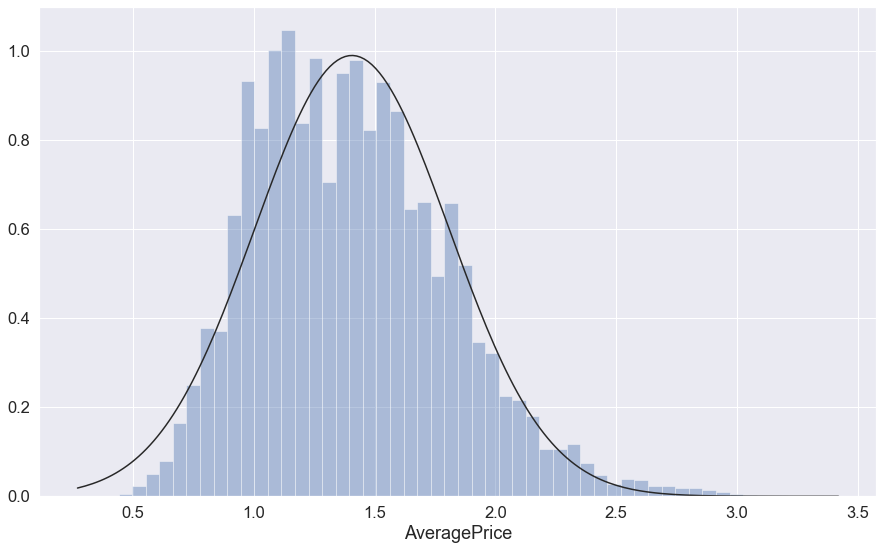

In [9]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df_main.AveragePrice, kde=False, fit=norm)

#### The above figure depicts that our target Variable Average Price is normally distributed. And Maximum Values lies between 1.0 to 2.0

#### How is the trend of Average Price Year on Year?

In [76]:
avocado_date=df_main.groupby('Date').mean()


Text(0, 0.5, 'Average Price')

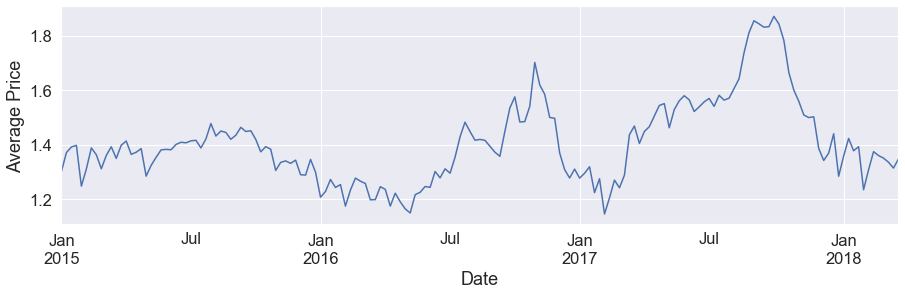

In [77]:
avocado_date.AveragePrice.plot(figsize=(15,4))
plt.ylabel('Average Price')

As per the graph above the Average Price of Avacados is increasing year or year. So it seems that it is a profitable market for investing.

#### Check the Price for different types of Avacados?

In [79]:
#Average Price vs Type

avacado_type=df_main.groupby('type').mean()

Text(0.5, 1.0, 'Average Price of Avocado According to Types')

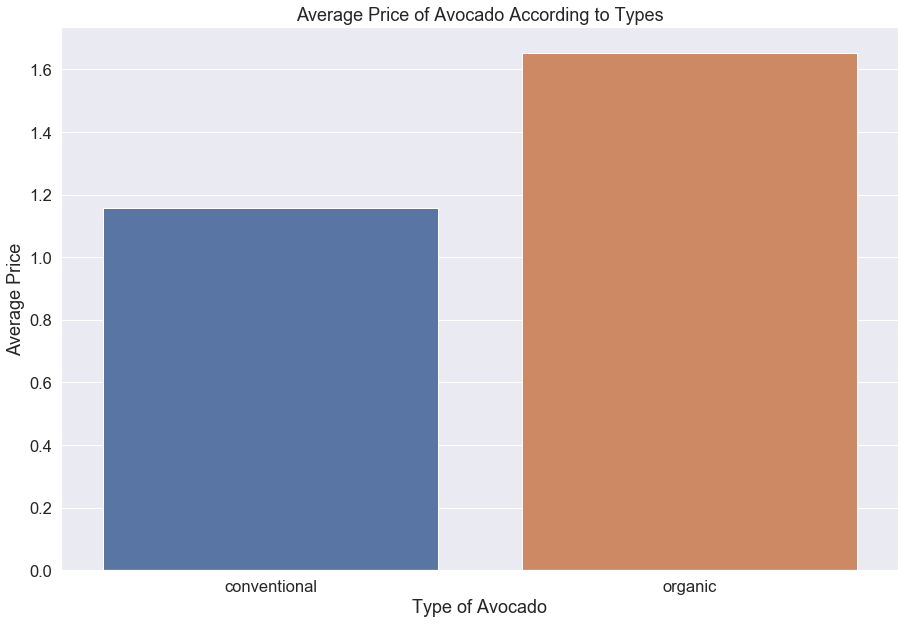

In [80]:
plt.figure(figsize=(15,10))

x = df_main.type.unique()
y = df_main.groupby('type').mean()['AveragePrice']
ax=sns.barplot(x=x,y=y)
plt.xlabel('Type of Avocado')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Types')

#avocado_type.AveragePrice.plot(figsize=(15,4), )
#plt.ylabel('Type')



There are two categories Conventional and Organic, but the Average Price of Organic Avacados is more than converntional one.This is because the high capex on the production of organic Avacados.


#### How is the Demad in all regions?

Text(0.5, 1.0, 'Total Volume of Avocado According to Region')

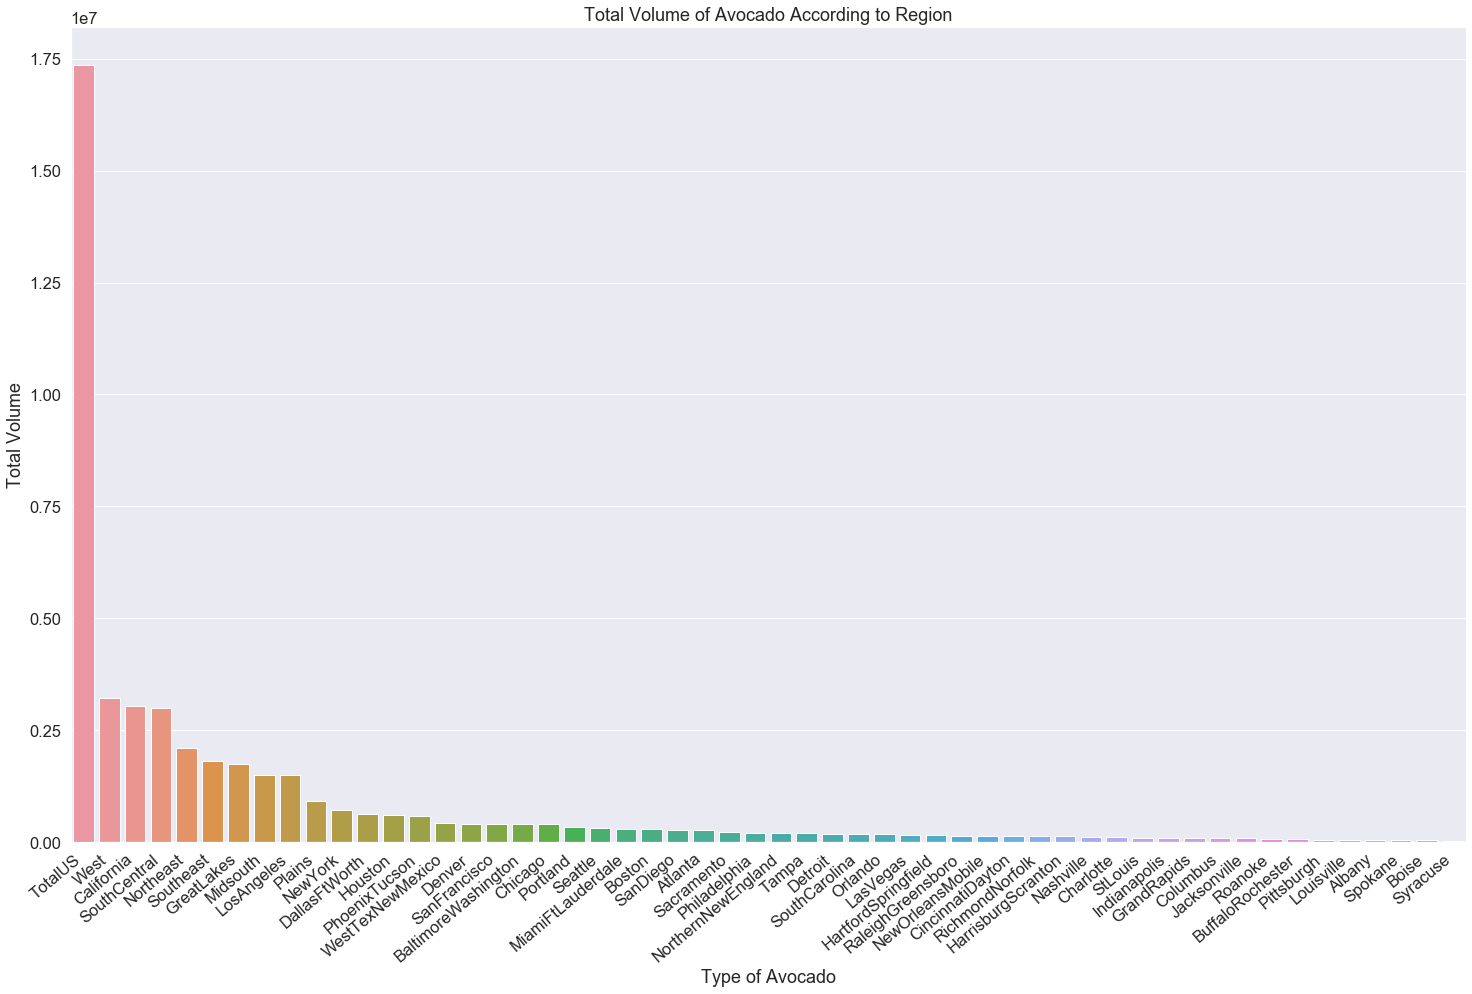

In [81]:
sorted_df = df_main.groupby('region').mean()['Total Volume'].sort_values(ascending=False).reset_index()
plt.figure(figsize=(25,15))

x = sorted_df.region.unique()
y = sorted_df.groupby('region').mean()['Total Volume'].sort_values(ascending=False)
ax=sns.barplot(x=x,y=y)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Type of Avocado')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocado According to Region')





The graph above depicts that Total US has the highest requirement compared to all other regions.
And after that West California and South Central.
So, we should try and approach these zones for getting contracts.

#### How is the demand for organic and conventional Avacados in all the years?

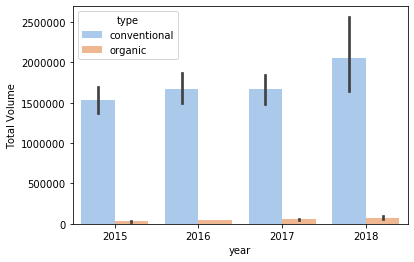

In [106]:
sns.barplot(x="year", y="Total Volume", hue="type",
           
            palette="pastel", data=df_main);

Above Graph shows that demand for conventional avacados is much more for Organic Avacados. And we have high requirement in 2018.

#### How is price varying for Conventional and Organic Avacados?

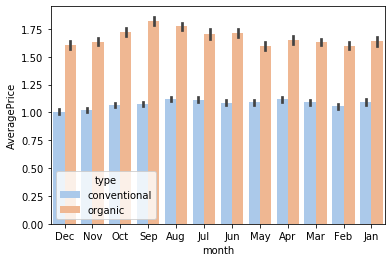

In [40]:
sns.barplot(x="month", y="AveragePrice", hue="type",
           
            palette="pastel", data=df_main[df_main['year']==2015]);

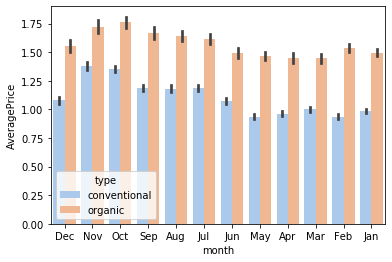

In [41]:
sns.barplot(x="month", y="AveragePrice", hue="type",
           
            palette="pastel", data=df_main[df_main['year']==2016]);

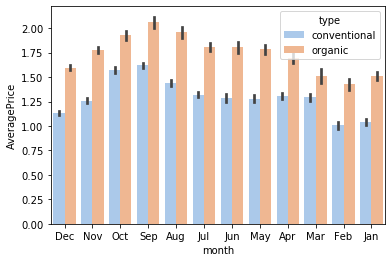

In [42]:
sns.barplot(x="month", y="AveragePrice", hue="type",
           
            palette="pastel", data=df_main[df_main['year']==2017]);

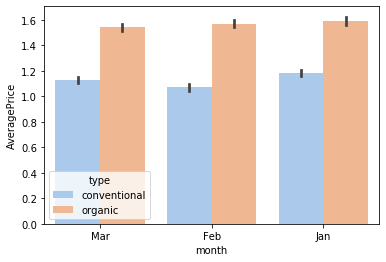

In [43]:
sns.barplot(x="month", y="AveragePrice", hue="type",palette="pastel", data=df_main[df_main['year']==2018]);

When analysing data yearly, the Price of Avacados is always high in Quarter 3. I think it is the requirement of particular season that it increases. And Average Price of Organic Avacados is higher than conventional ones. People Buy more conventional ones then organic ones.

#### Which Package is in high demand?

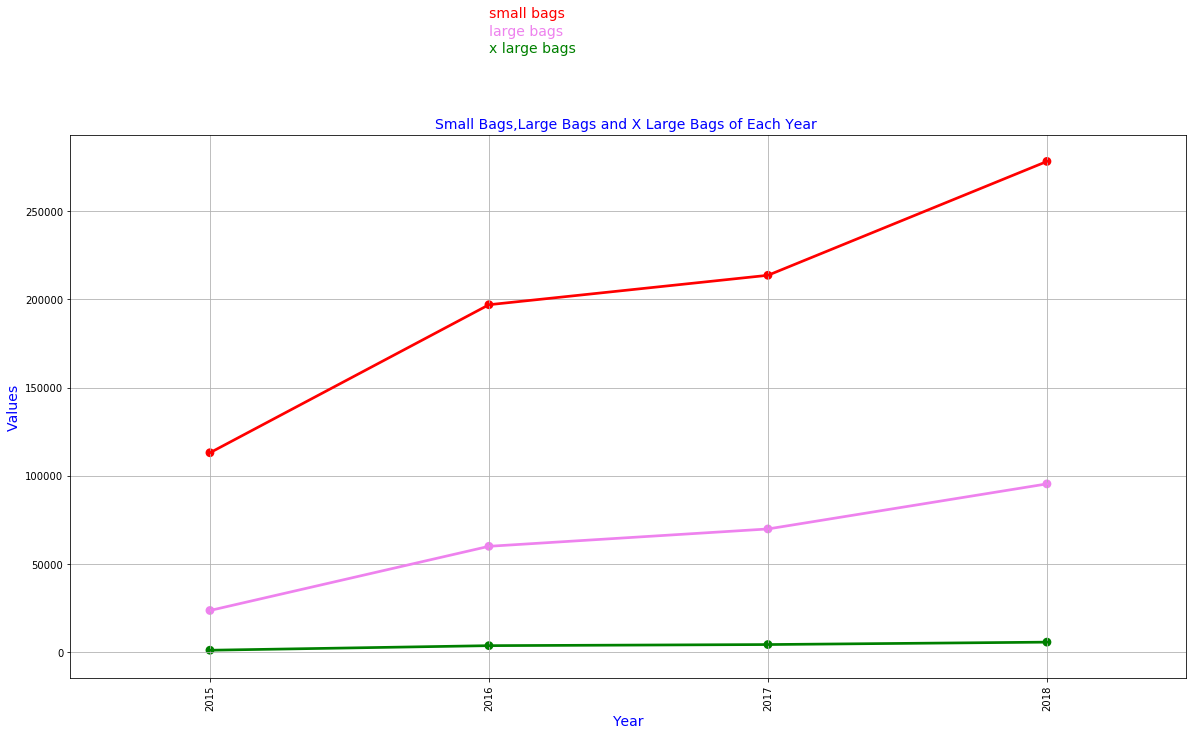

In [45]:
x = df_main.year.unique()
y1 = df_main.groupby('year').mean()['Small Bags'] 
y2 = df_main.groupby('year').mean()['Large Bags']
y3 = df_main.groupby('year').mean()['XLarge Bags']
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=x,y=y1,data=df_main,color='Red',alpha=0.7)
sns.pointplot(x=x,y=y2,data=df_main,color='Violet',alpha=0.7)
sns.pointplot(x=x,y=y3,data=df_main,color='Green',alpha=0.7)

plt.xticks(rotation=90)
plt.text(1,360000,'small bags',color='red',fontsize=14)
plt.text(1,350000,'large bags',color='violet',fontsize=14)
plt.text(1,340000,'x large bags', color='green',fontsize=14)

plt.xlabel('Year',color='blue',fontsize=14)
plt.ylabel('Values',color='blue',fontsize=14)
plt.title('Small Bags,Large Bags and X Large Bags of Each Year ',color='blue',fontsize=14)
plt.grid()

The above figure shows, how the packaging affects. The number of Small bags are always sold of in high number during all years 
and the XLarge Bags sale is constant across the years. May be only few big companies buy XLarge Bags. And Majority of population buys 
small bags of Avacados for daily needs.

#### Which HASS category is in high demand?

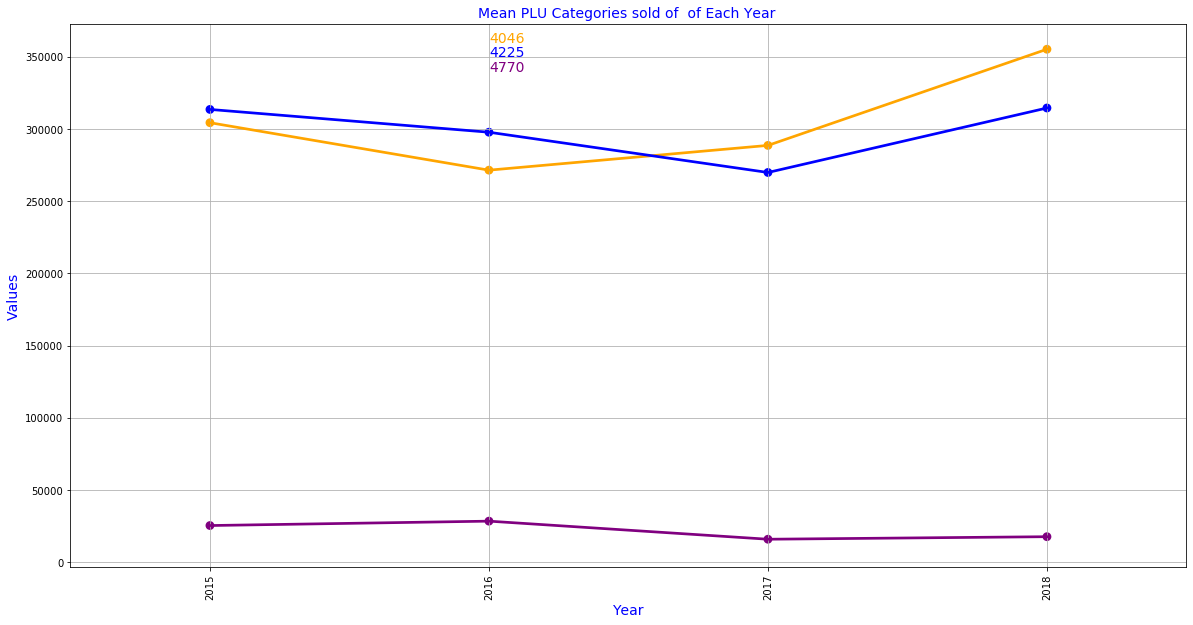

In [46]:
x = df_main.year.unique()
y1 = df_main.groupby('year').mean()['4046'] 
y2 = df_main.groupby('year').mean()['4225']
y3 = df_main.groupby('year').mean()['4770']
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=x,y=y1,data=df_main,color='Orange',alpha=0.7)
sns.pointplot(x=x,y=y2,data=df_main,color='Blue',alpha=0.7)
sns.pointplot(x=x,y=y3,data=df_main,color='Purple',alpha=0.7)

plt.xticks(rotation=90)
plt.text(1,360000,'4046',color='orange',fontsize=14)
plt.text(1,350000,'4225',color='blue',fontsize=14)
plt.text(1,340000,'4770', color='purple',fontsize=14)

plt.xlabel('Year',color='blue',fontsize=14)
plt.ylabel('Values',color='blue',fontsize=14)
plt.title('Mean PLU Categories sold of  of Each Year ',color='blue',fontsize=14)
plt.grid()

The above figure shows the number of avacados sold for each PLU category.Small and Medium Hass category is always sold in high demand. Except the Extra Large (4770) category, which is in low demand alwaysand trend shows little less demand.

#### How is the trend in different years for Organic Avacados?

In [27]:
data_2018=df_main[df_main['year']==2018]
data_2017=df_main[df_main['year']==2017]
data_2016=df_main[df_main['year']==2016]
data_2015=df_main[df_main['year']==2015]

data_2018_organic=data_2018[data_2018['type']=='organic']
data_2017_organic=data_2017[data_2017['type']=='organic']
data_2016_organic=data_2016[data_2016['type']=='organic']
data_2015_organic=data_2015[data_2015['type']=='organic']


data_organic=df_main[df_main['type']=='organic']
y2 = data_2017_organic.groupby('month').mean()['Total Volume'].sort_values(ascending=True).reset_index()
y3 = data_2016_organic.groupby('month').mean()['Total Volume'].sort_values(ascending=True).reset_index()
y4 = data_2015_organic.groupby('month').mean()['Total Volume'].sort_values(ascending=True).reset_index()


Text(0.5, 1.0, 'Mean Tota_Volume sold of  of Each Year ')

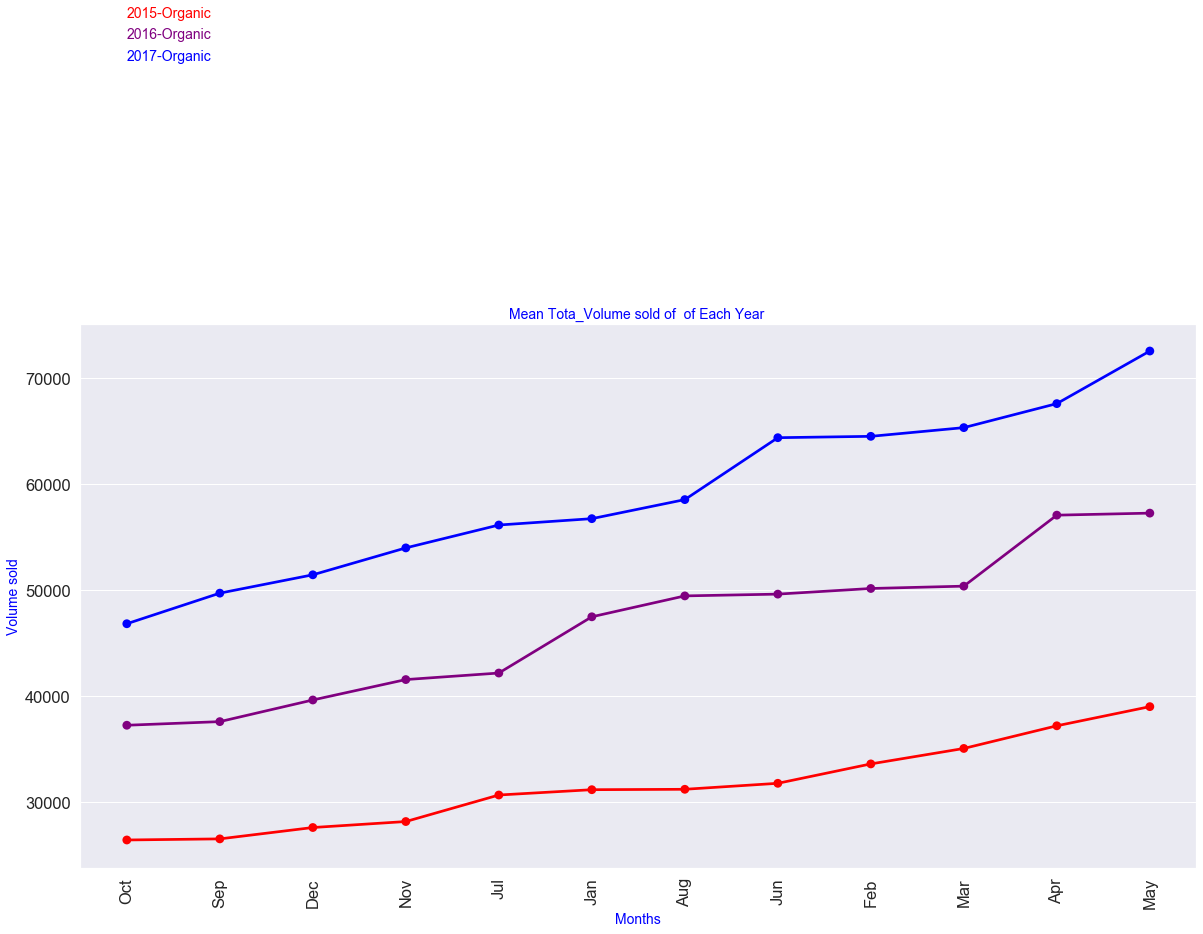

In [82]:
#x = data_organic.month.unique()
#y1 = data_2018_organic.groupby('month').mean()['Total Volume'] 
#y2 = data_2017_organic.groupby('month').mean()['Total Volume']
#y3 = data_2016_organic.groupby('month').mean()['Total Volume']
#y4 = data_2015_organic.groupby('month').mean()['Total Volume']
#y2 = y2[]
f,ax1=plt.subplots(figsize=(20,10))
#sns.pointplot(x=x,y=y1,data=df_main,color='Orange',alpha=0.7)
sns.pointplot(x=y2['month'],y=y2['Total Volume'],data=y2,color='Blue',alpha=0.7)
sns.pointplot(x=y3['month'],y=y3['Total Volume'],data=y3,color='Purple',alpha=0.7)
sns.pointplot(x=y4['month'],y=y4['Total Volume'],data=df_main,color='Red',alpha=0.7)

plt.xticks(rotation=90)
plt.text(0,100000,'2017-Organic',color='blue',fontsize=14)
plt.text(0,102000,'2016-Organic',color='purple',fontsize=14)
plt.text(0,104000,'2015-Organic', color='red',fontsize=14)

plt.xlabel('Months',color='blue',fontsize=14)
plt.ylabel('Volume sold',color='blue',fontsize=14)
plt.title('Mean Tota_Volume sold of  of Each Year ',color='blue',fontsize=14)
#plt.grid()

The above graph depicts that every year Organic Avacados volume sold is increasing and Maximum Volume is sold during month of April and May

#### Check Correlation between Explanatory Variables

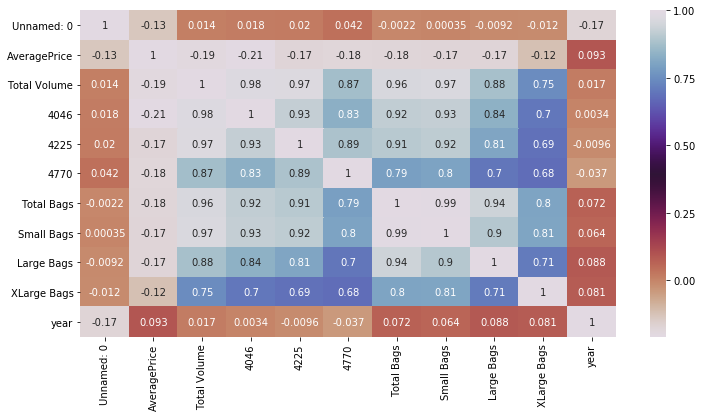

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(df_main.corr(),cmap='twilight_r',annot=True)

Above Graph shows strongly correlated columns and hence we will drop these.

<a id='section3b'></a>
## Data Cleaning

In [84]:
df_main.drop('Unnamed: 0', axis = 1, inplace = True) #Dropping Id column

In [85]:
df_main.drop(['4225', 'Small Bags', 'Total Bags', 'Total Volume'], axis = 1, inplace = True)# Dropping columns which have multicollinearity

For applying regression modelling, we should replace the categorical columns to Numerical ones. 
Here region has 54 regions, we are not considering it for developing the model as it would create 53 new columns after One hot encoding
So, we should drop Region and convert the type to numerical

In [86]:
df_main.drop('region', axis = 1, inplace = True) # Dropping region as it has many categories and to apply regression we need numerical columns

In [87]:
df_main.drop('Date', axis = 1, inplace = True)

In [88]:
df_main

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type,year,month
0,1.33,1036.74,48.16,93.25,0.0,conventional,2015,Dec
1,1.35,674.28,58.33,97.49,0.0,conventional,2015,Dec
2,0.93,794.70,130.50,103.14,0.0,conventional,2015,Dec
3,1.08,1132.00,72.58,133.76,0.0,conventional,2015,Dec
4,1.28,941.48,75.78,197.69,0.0,conventional,2015,Nov
...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,0.00,431.85,0.0,organic,2018,Feb
18245,1.71,1191.70,0.00,324.80,0.0,organic,2018,Jan
18246,1.87,1191.92,727.94,42.31,0.0,organic,2018,Jan
18247,1.93,1527.63,727.01,50.00,0.0,organic,2018,Jan


 <a id='section4'></a> 
## Data Preparation for Modelling 

<a id='section4a'></a>

### Encoding Categorical Data

In [89]:
df_main=pd.get_dummies(data=df_main, columns=['type','month','year'], drop_first=True)

In [90]:
df_main

,AveragePrice,4046,4770,Large Bags,XLarge Bags,type_organic,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,year_2016,year_2017,year_2018
0,1.33,1036.74,48.16,93.25,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1.35,674.28,58.33,97.49,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.93,794.70,130.50,103.14,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.08,1132.00,72.58,133.76,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1.28,941.48,75.78,197.69,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,0.00,431.85,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18245,1.71,1191.70,0.00,324.80,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
18246,1.87,1191.92,727.94,42.31,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
18247,1.93,1527.63,727.01,50.00,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


<a id='section4b'></a>
#### Scaling Numerical Data

In [91]:
Ytrain = df_main.AveragePrice
df_main = df_main.drop(['AveragePrice'], axis=1)


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_main)
data1 = scaler.transform(df_main)

<a id='section5'></a>
## Modelling

<a id='section5a'></a>
### Checking Pre-requisites for applying Linear Regression.

1. Check that AveragePrice is Linearly related with Explanatory Variables
2. Taget Variable is normally discributed (Seen in EDA Part)
3. No Explanatory Variables should be correlated( checked in Profile report and dropped correlated columns)
4. Error terms should be constant variance(homoscedascity).Since the Target Variable (In this case the AveragePrice column) is normally distributed, the error will also be normally distributed

Check that EV's are linearly related to Target Variables'

In [35]:
features=['4046','4770','Large Bags', 'XLarge Bags']
result='AveragePrice'

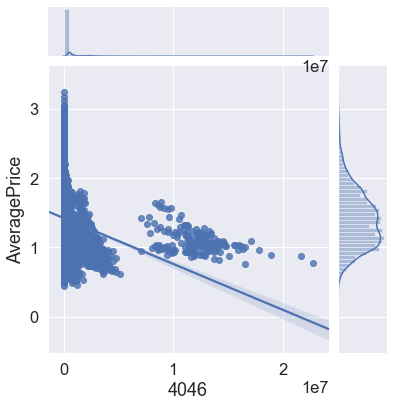

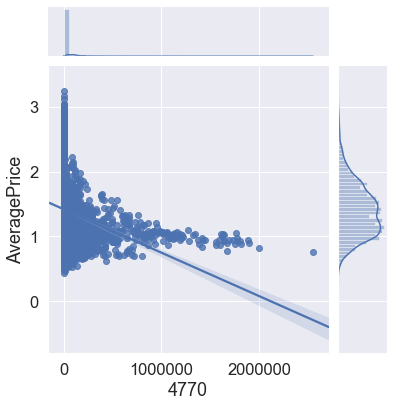

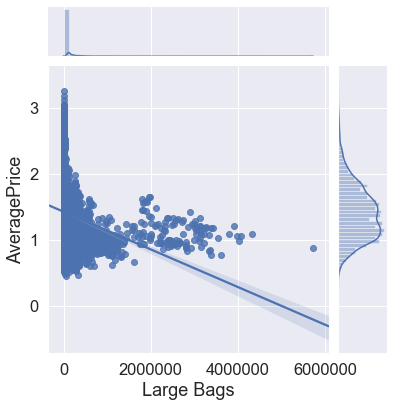

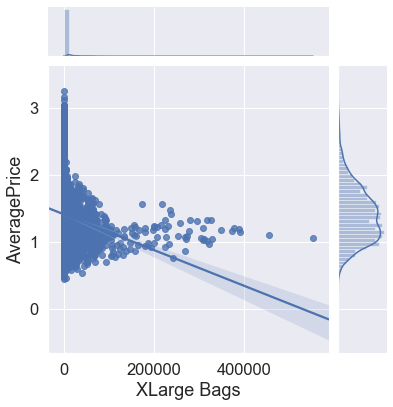

In [36]:
for feature in features:
    sns.jointplot(feature, result, data=df_main, kind='reg')

 ### Splitting the data into train and test data

In [45]:
df_main.shape

(18249, 19)

In [46]:
Ytrain.shape

(18249,)

In [47]:
Ytrain

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
def split(x, y):
    return train_test_split(x, y, test_size=0.20, random_state=1)
x_train,x_test,y_train,y_test = split(df_main, Ytrain)

In [49]:
print('Train cases as below')
print('X_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14599, 19)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 19)
y_test shape:  (3650,)


<a id='section5b'></a>
Data is ready for applying Modelling.
#### Let's apply Linear regression

In [51]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_pred_train = linreg.predict(x_train) 

In [54]:
y_pred_test = linreg.predict(x_test)

<a id='section5c'></a>
#### Model Evaluation (Linear Regression)

In [55]:
from sklearn import metrics

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [56]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.22299336238505627
MAE for test set is 0.22495292194937028


In [57]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

Mean Absolute error and Root mean square error are almost coming out as same for train and test set.

<a id='section5d'></a>
#### Let's try Decision Tree regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

<a id='section5e'></a>
#### Model Evaluation(Decision Tree Regressor)

In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.17781123287671236
MSE: 0.07313775369863014
RMSE: 0.270439926228784


<a id='section5f'></a>
### Let's try Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

C:\Users\esvwzab\AppData\Local\Continuum\Anaconda3\envs\tensor\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<a id='section5g'></a>
#### Model Evaluation Random Forest Regressor

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.14014791878669275
MSE: 0.04104792364663631
RMSE: 0.20260287176305353


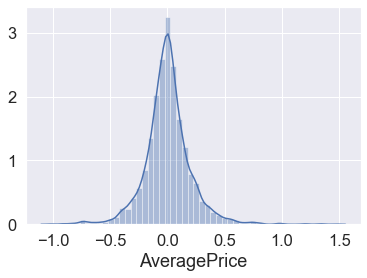

In [67]:
sns.distplot((y_test-pred),bins=50)

Error is normally distributed. So our assumption are fine

,Y Test,Pred
14192,2.11,1.686
1873,0.98,1.041
7293,1.17,1.149
15087,1.78,1.246
9888,1.61,1.893


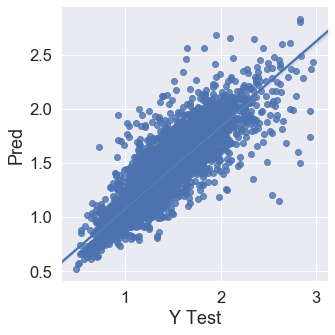

In [68]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

The above graph between Predicted value of target variable and actual value of target variable on Test data, shows that most of the points are concentrated at the line of best fit. So, out model has made good prediction with a rmse of 0.20. So Random Forest has reaped in best results for this data set.

 <a id='section6'></a> 

## Conclusions

- Investing in Avacado Market in US can reap good profits. As yearly trend shows increasing demand of Avacados
- Small Packs are in high demand as opposed to XLarge Packets
- Price of conventional avacados is much lesser than oragnic avacados, and demand for conventional avacados is much more than organic ones
- While analysing the HASS category of Avacados, we found that small and medium show increasing demands. But the Extra Large Avacados shows constant demand only.
- Total US has the extremely high demand as compared to other regions
- It's not a good choice to invest in below regions
    - Jacksonville
    - Roanoke
    - BuffaloRochester
    - Pittsburgh
    - Louisville
    - Albany
    - Spokane
    - Boise
    - Syracuse
